<a href="https://colab.research.google.com/github/premkumar6/GRIP-DataScience-Intern/blob/main/Sol4_Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation

# Domain: Data Science & Bussiness Analytics

# Batch : November 2021

# Author : Premkumar Ganesan

# Task 4 : EDA - Global Terrorism

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/globalterrorismdb_0718dist 2.csv", encoding='latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN


In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
data = data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
data.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            413
Region             0
city               0
latitude        3812
longitude       3813
AttackType         0
Killed          6244
Wounded         8746
Target           474
Summary        66129
Group              0
Target_type        0
Weapon_type        0
Motive         66440
dtype: int64

In [ ]:
data.shape

(75627, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75627 entries, 0 to 75626
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         75627 non-null  int64  
 1   Month        75627 non-null  int64  
 2   Day          75627 non-null  int64  
 3   Country      75627 non-null  object 
 4   State        75214 non-null  object 
 5   Region       75627 non-null  object 
 6   city         75627 non-null  object 
 7   latitude     71815 non-null  float64
 8   longitude    71814 non-null  float64
 9   AttackType   75627 non-null  object 
 10  Killed       69383 non-null  float64
 11  Wounded      66881 non-null  float64
 12  Target       75153 non-null  object 
 13  Summary      9498 non-null   object 
 14  Group        75627 non-null  object 
 15  Target_type  75627 non-null  object 
 16  Weapon_type  75627 non-null  object 
 17  Motive       9187 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory usa

In [ ]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,75627.000000,75627.000000,75627.000000,71815.000000,7.181400e+04,69383.000000,66881.000000
mean,1988.315086,6.441509,15.349954,19.069307,-1.208453e+03,2.290821,2.605149
std,7.447205,3.398264,8.817120,23.889732,3.216115e+05,12.466462,53.529970
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1983.000000,3.000000,8.000000,6.242026,-7.528527e+01,0.000000,0.000000
50%,1989.000000,6.000000,15.000000,18.386932,-3.768050e-01,0.000000,0.000000
75%,1994.000000,9.000000,23.000000,38.499753,3.537096e+01,1.000000,1.000000
max,2003.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000


In [ ]:
print("Country with the most attacks:", data['Country'].value_counts().idxmax(),"(",max(data['Country'].value_counts()),"attacks)")
print("City with the most attacks:", data['city'].value_counts().index[1],"(",data['city'].value_counts()[1],"attacks)") #as first entry is 'unknown'
print("Region with the most attacks:", data['Region'].value_counts().idxmax(),"(",max(data['Region'].value_counts()),"attacks)")
print("Year with the most attacks:", data['Year'].value_counts().idxmax(),"(",max(data['Year'].value_counts()),"attacks)")
print("Month with the most attacks:", data['Month'].value_counts().idxmax(),"(",max(data['Month'].value_counts()),"attacks)")
print("Group with the most attacks:", data['Group'].value_counts().index[1],"(",data['Group'].value_counts()[1],"attacks)")
print("Most Attack Types:", data['AttackType'].value_counts().idxmax(),"(",max(data['AttackType'].value_counts()),"attacks)")

Country with the most attacks: Colombia ( 6768 attacks)
City with the most attacks: Lima ( 2355 attacks)
Region with the most attacks: South America ( 17098 attacks)
Year with the most attacks: 1992 ( 5071 attacks)
Month with the most attacks: 5 ( 6960 attacks)
Group with the most attacks: Shining Path (SL) ( 4507 attacks)
Most Attack Types: Bombing/Explosion ( 32171 attacks)


In [ ]:
max(data[data['Country']=="Algeria"].count())

1818

In [ ]:
max(data[data['Country']=="Morocco"].count())

28

In [ ]:
!pip install wordcloud

# Exploratory Data Analysis

# WordCloud

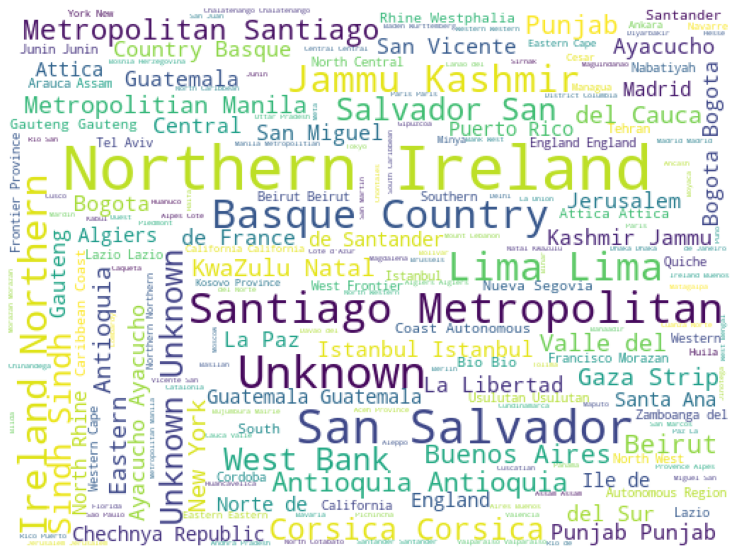

In [ ]:
from wordcloud import WordCloud
from scipy import signal

cities = data.State.dropna(False)
plt.subplots(figsize=(20,10))

wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

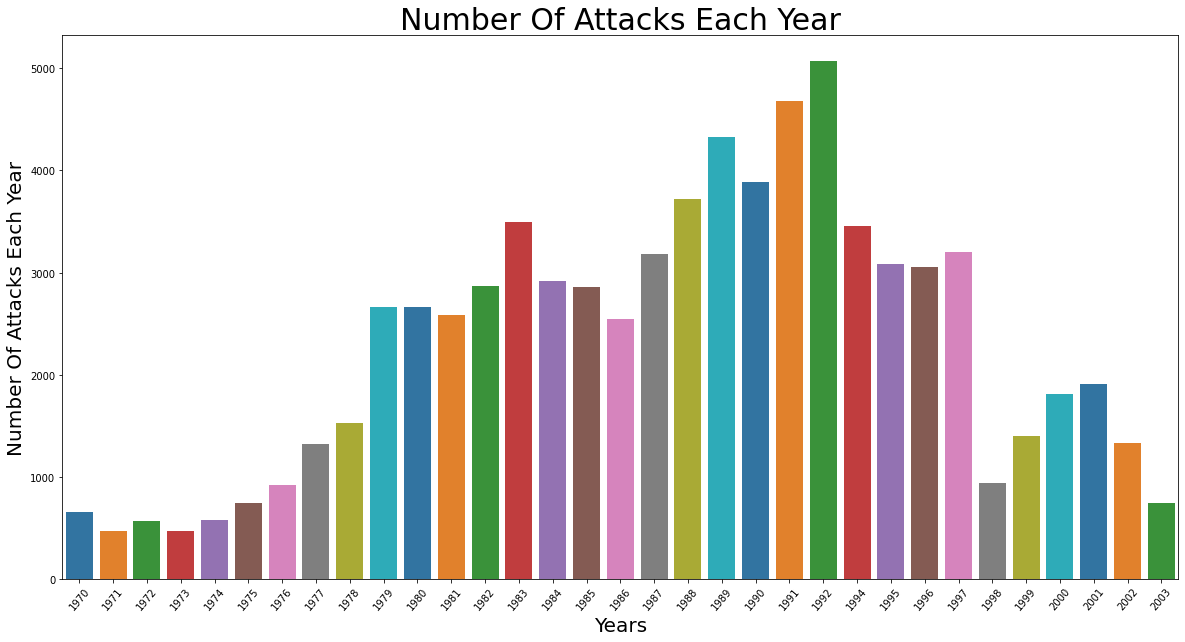

In [ ]:
year= data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(x=year,y=years_count,palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Number Of Attacks Each Year',fontsize=20)
plt.title('Number Of Attacks Each Year',fontsize=30)
plt.show()

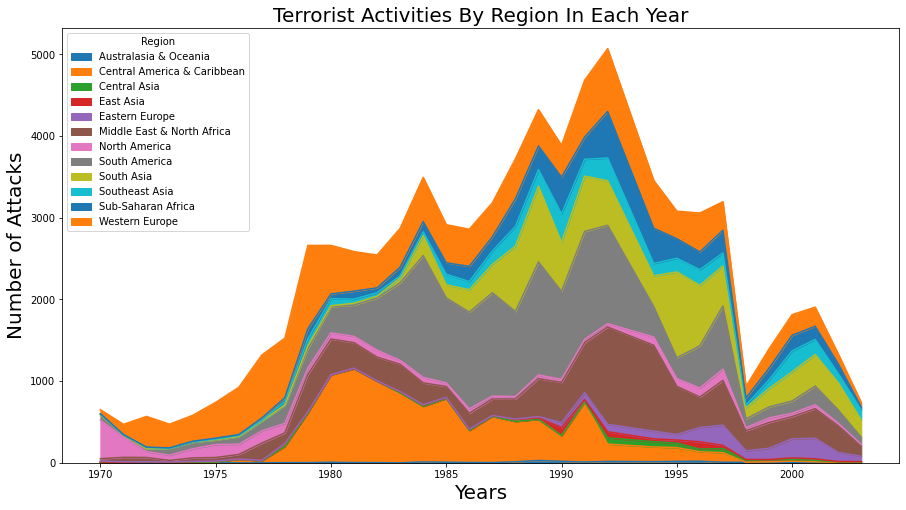

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,8))
plt.title('Terrorist Activities By Region In Each Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.show()

In [ ]:
data['Wounded'] = data['Wounded'].fillna(0).astype(int)
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['Casualities'] = data['Killed'] + data['Wounded']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
data.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0,0


In [ ]:
worst_40terror_attacks = data.sort_values(by='Casualties', ascending=False)[:40]

In [ ]:
heat=worst_40terror_attacks.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)

In [ ]:
heat

Year,1978,1980,1981,1982,1983,1984,1985,1987,1992,1994,1995,1996,1997,1998,1999,2001,2002
Country,,,,,,,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,450.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,396.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,389.5,0.0,0.0,0.0,0.0,0.0
Canada,0.0,0.0,0.0,0.0,0.0,0.0,329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
El Salvador,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,0.0,0.0,0.0,400.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iran,422.0,0.0,0.0,760.0,0.0,318.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


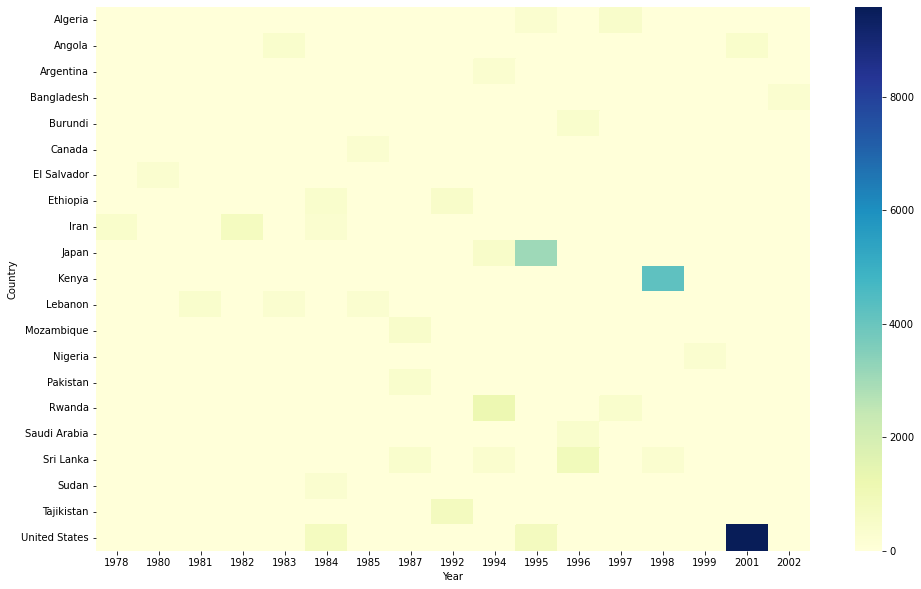

In [ ]:
plt.figure(figsize = (16,10))
ax = sns.heatmap(heat, cmap="YlGnBu")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


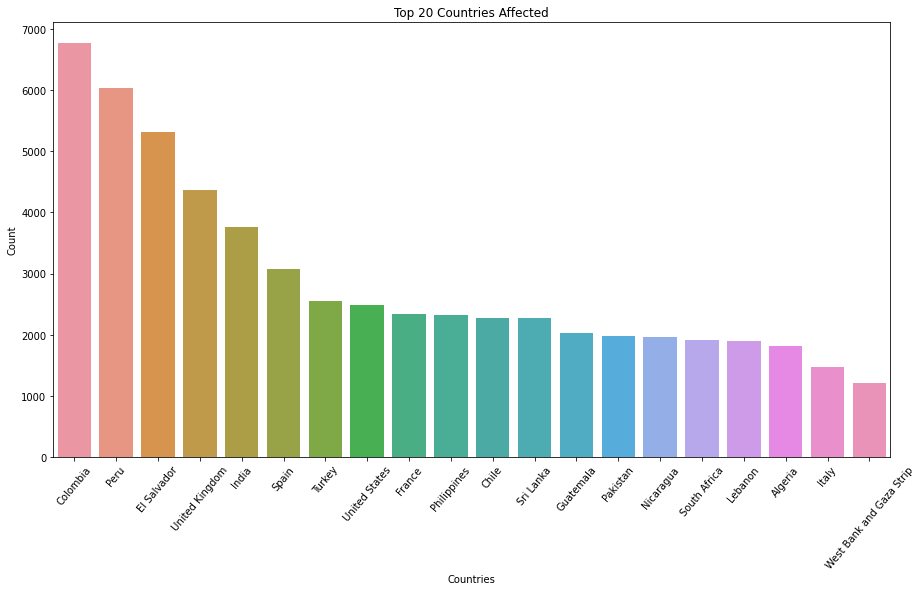

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(data['Country'].value_counts()[:20].index,data['Country'].value_counts()[:20].values)
plt.title('Top 20 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


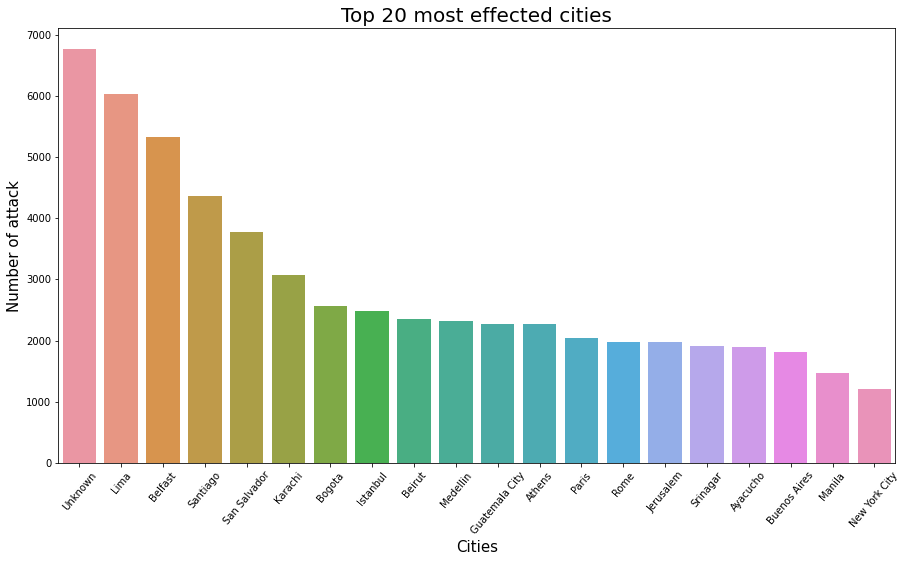

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(data['city'].value_counts()[:20].index,data['Country'].value_counts()[:20].values)
plt.title('Top 20 most effected cities', fontsize=20)
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Number of attack',fontsize=15)
plt.xticks(rotation= 50)
plt.show()

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import MarkerCluster 

In [ ]:
filterData = data[data['Year'] == 2017] # filter data
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()

In [ ]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map